# Mi primer proyecto de vision computacional

Este primer proyecto es un ejemplo de como utilizar OpenCV de manera efectiva.

In [116]:
#import librerrias 
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [117]:
!pip install matplotlib  


# Parte 1. Operaciones basicas


El tamano de la imagen es:  (163, 309, 3)


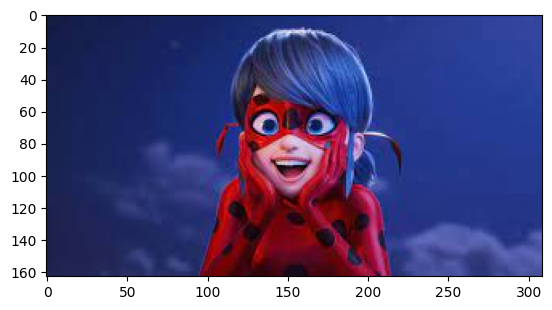

In [118]:
bgr_image = cv2.imread('images.jpg')
print("El tamano de la imagen es: ", bgr_image.shape)

# convertir la imagen de BGR a RGB
rgb= cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

# mostrar la imagen
plt.imshow(rgb)


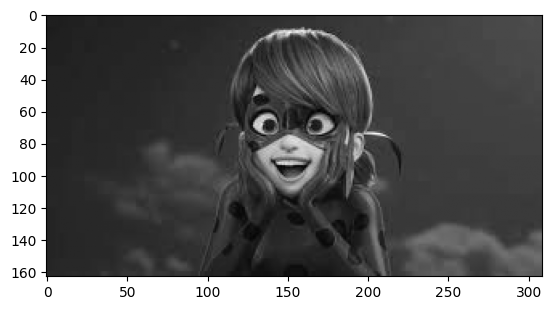

In [119]:
# Mostrar la imagen en escala de grises
gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')



Text(0.5, 1.0, 'Componente Roja')

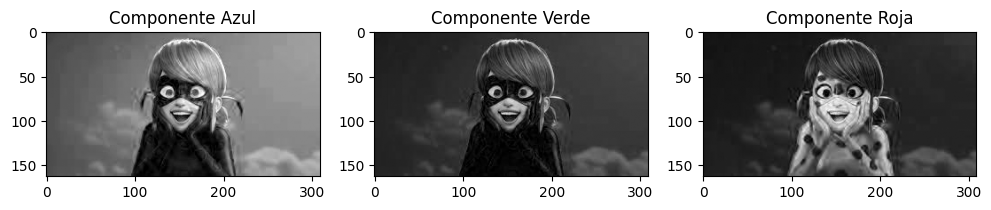

In [120]:
# Mostrar las componentes de color de la imagen
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(bgr_image[:,:,0], cmap='gray')
plt.title('Componente Azul')
plt.subplot(1,3,2)
plt.imshow(bgr_image[:,:,1], cmap='gray')
plt.title('Componente Verde')
plt.subplot(1,3,3)
plt.imshow(bgr_image[:,:,2], cmap='gray')
plt.title('Componente Roja')


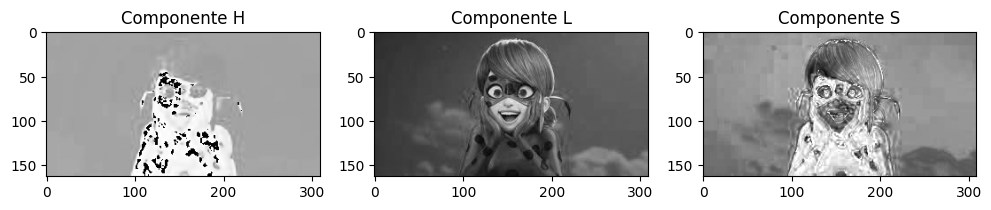

In [121]:
# Mostrar las componentes HLS de la imagen
hls_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HLS)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(hls_image[:,:,0], cmap='gray')
plt.title('Componente H')
plt.subplot(1,3,2)
plt.imshow(hls_image[:,:,1], cmap='gray')
plt.title('Componente L')
plt.subplot(1,3,3)
plt.imshow(hls_image[:,:,2], cmap='gray')
plt.title('Componente S')
plt.show()



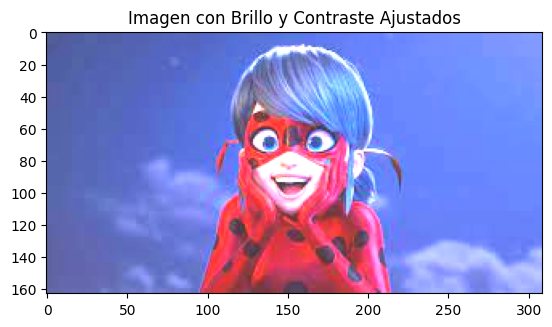

In [122]:
# ajuste de brillo y contraste
alpha = 1.5 # Contraste
beta = 50   # Brillo
adjusted = cv2.convertScaleAbs(bgr_image, alpha=alpha, beta=beta)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Brillo y Contraste Ajustados')
plt.show()



# Parte 2. Filtardo y transformaciones


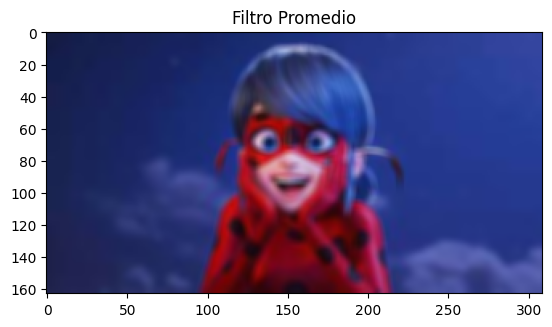

In [123]:
#Aplicacion de filtros
# Filtro de filtro promedio
kernel_size = 5
blurred = cv2.blur(bgr_image, (kernel_size, kernel_size))
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('Filtro Promedio')
plt.show()

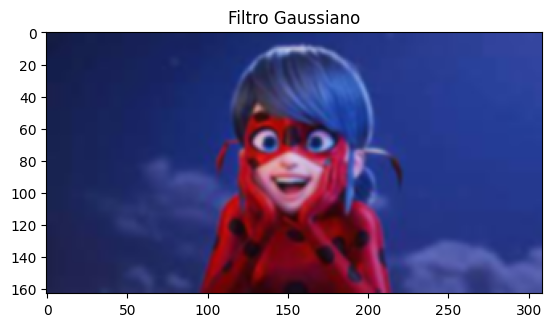

In [124]:
#Aplocacion de filtro gaussiano
gaussian_blurred = cv2.GaussianBlur(bgr_image, (kernel_size, kernel_size), 0)
plt.imshow(cv2.cvtColor(gaussian_blurred, cv2.COLOR_BGR2RGB))
plt.title('Filtro Gaussiano')
plt.show()

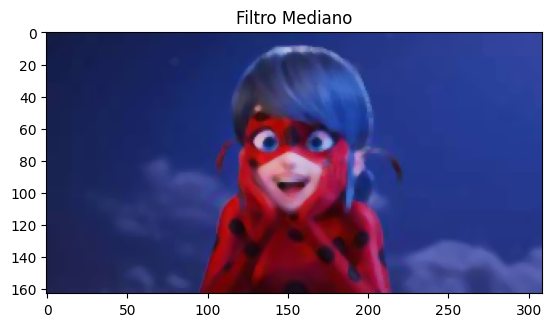

In [125]:
# Aplicacion de filtro mediano
median_blurred = cv2.medianBlur(bgr_image, kernel_size)
plt.imshow(cv2.cvtColor(median_blurred, cv2.COLOR_BGR2RGB))
plt.title('Filtro Mediano')
plt.show()


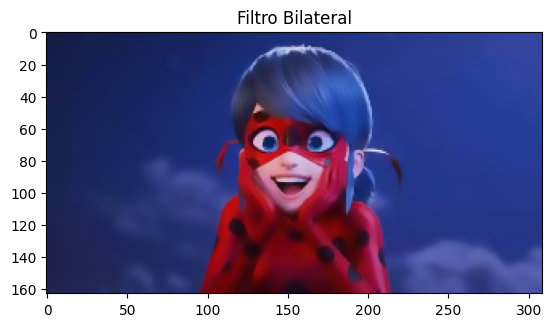

In [126]:
# Aplicacion de filtro bilateral
bilateral_blurred = cv2.bilateralFilter(bgr_image, d=9, sigmaColor=75, sigmaSpace=75)
plt.imshow(cv2.cvtColor(bilateral_blurred, cv2.COLOR_BGR2RGB))
plt.title('Filtro Bilateral')
plt.show()


#Transformaciones Geometricas


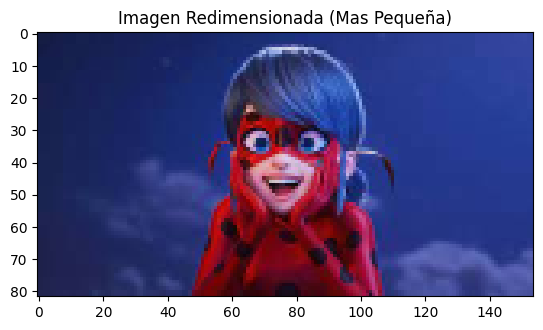

In [127]:
# Aplicar transformaciones geometricas
# Redimensionar a mas pequeña
resized_small = cv2.resize(bgr_image, (0,0), fx=0.5, fy=0.5)
plt.imshow(cv2.cvtColor(resized_small, cv2.COLOR_BGR2RGB))
plt.title('Imagen Redimensionada (Mas Pequeña)')
plt.show()

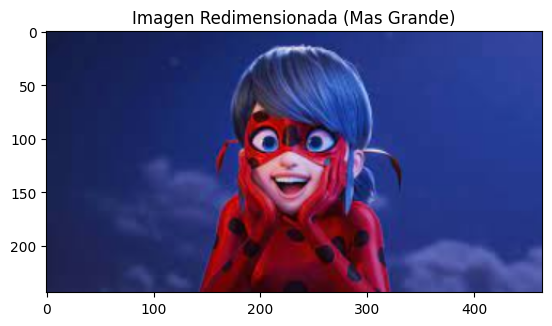

In [128]:
# Redimensionar mas grande
resized_large = cv2.resize(bgr_image, (0,0), fx=1.5, fy=1.5)
plt.imshow(cv2.cvtColor(resized_large, cv2.COLOR_BGR2RGB))
plt.title('Imagen Redimensionada (Mas Grande)')
plt.show()

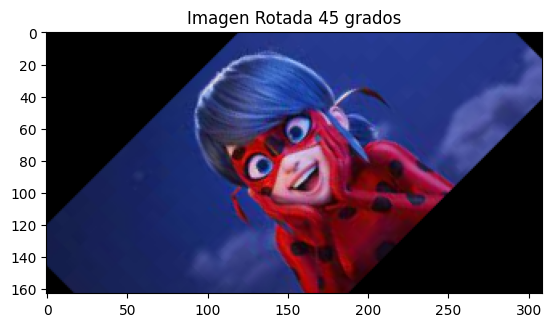

In [129]:
# Rotacion de la imagen
(h, w) = bgr_image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(bgr_image, M, (w, h))
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Imagen Rotada 45 grados')
plt.show()


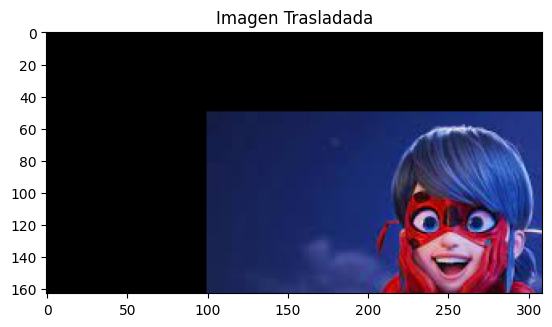

In [130]:
# Translacion de la imagen
M = np.float32([[1, 0, 100], [0, 1, 50]])
translated = cv2.warpAffine(bgr_image, M, (w, h))
plt.imshow(cv2.cvtColor(translated, cv2.COLOR_BGR2RGB))
plt.title('Imagen Trasladada')
plt.show()

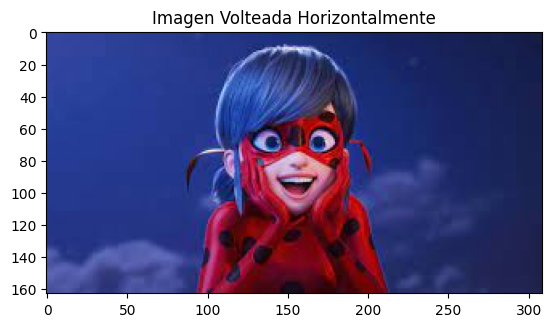

In [131]:
# Voltear la imagen horizontalmente
flipped = cv2.flip(bgr_image, 1)
plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
plt.title('Imagen Volteada Horizontalmente')
plt.show()


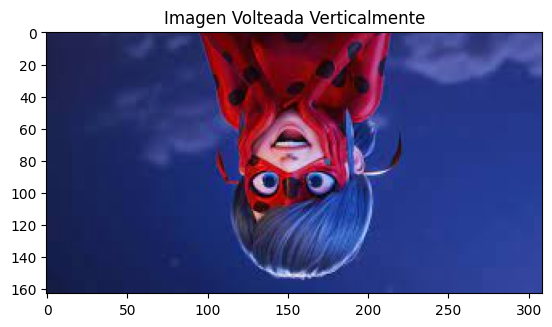

In [132]:
# Rotacion de la imagen verticalmente
flipped_vert = cv2.flip(bgr_image, 0)
plt.imshow(cv2.cvtColor(flipped_vert, cv2.COLOR_BGR2RGB))
plt.title('Imagen Volteada Verticalmente')
plt.show()


# Parte 3. Analisis de bordes y formas

#Aplicar Bordes:Canny, Sobel y Laplaciano

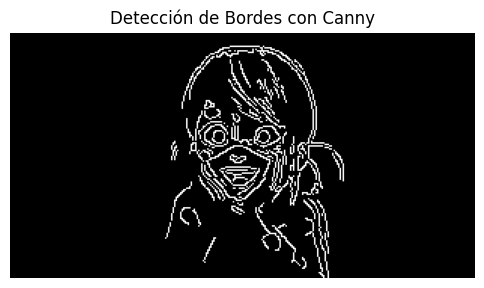

In [133]:
# Aplicar detección de bordes con Canny
edges = cv2.Canny(gray_image, 100, 200)
plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.title('Detección de Bordes con Canny')
plt.axis('off')
plt.show()

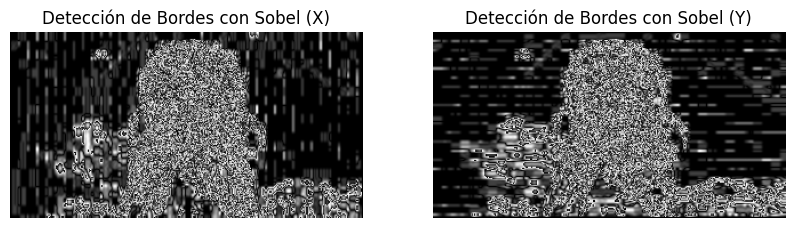

In [134]:
# Aplicación de bordes con Sobel en X y Y
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobelx_unit = np.uint8(np.absolute(sobelx))
sobely_unit = np.uint8(np.absolute(sobely))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(sobelx_unit, cmap='gray')
plt.title('Detección de Bordes con Sobel (X)')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sobely_unit, cmap='gray')
plt.title('Detección de Bordes con Sobel (Y)')
plt.axis('off')
plt.show()

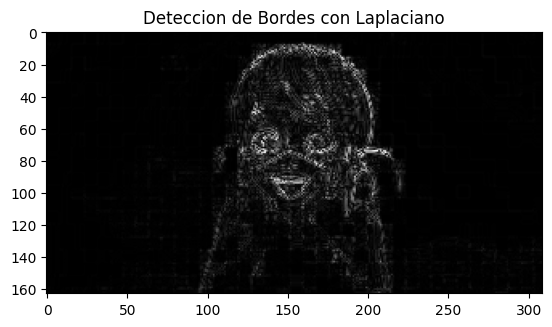

In [135]:
# Aplicacion de bordes con Laplaciano
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))
plt.imshow(laplacian, cmap='gray')
plt.title('Deteccion de Bordes con Laplaciano')
plt.show()


#Deteccion de esquinas: Harris, Shi-Tomasi

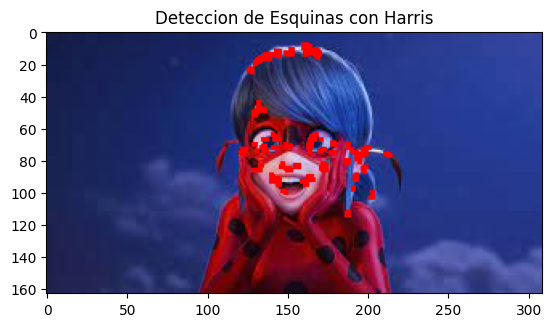

In [136]:
# Deteccion de esquinas Harris
dst = cv2.cornerHarris(gray_image, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
bgr_image[dst > 0.01 * dst.max()] = [0, 0, 255]
plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
plt.title('Deteccion de Esquinas con Harris')
plt.show()


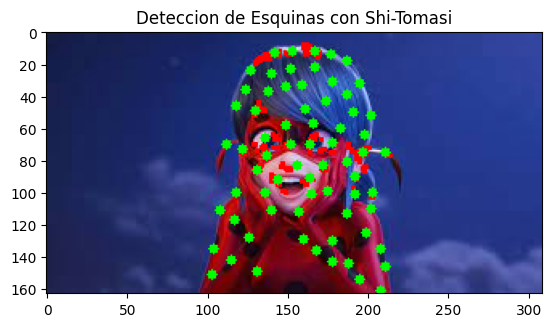

In [137]:
# Deteccion de esquinas con Shi-Tomasi
corners = cv2.goodFeaturesToTrack(gray_image, 100, 0.01, 10)
corners = corners.astype(int)
for i in corners:
    x, y = i.ravel()
    cv2.circle(bgr_image, (x, y), 3, (0, 255, 0), -1)
plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
plt.title('Deteccion de Esquinas con Shi-Tomasi')
plt.show()

#Deteccion de formas: HoughCircles y contornos principales



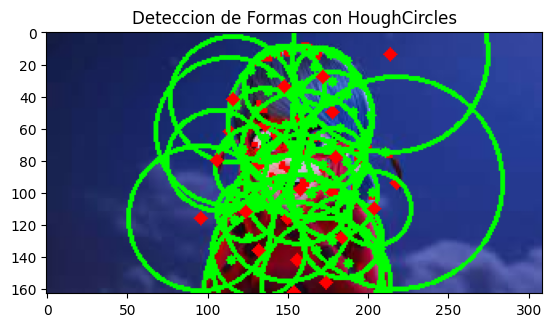

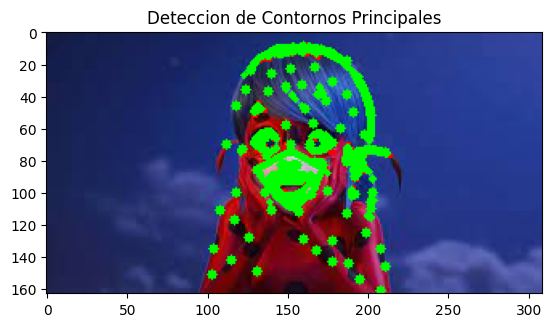

In [138]:
# Deteccion de formas con circulos de Hough y contornos principales
output_image = bgr_image.copy()
circles = cv2.HoughCircles(gray_image, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=10, maxRadius=80)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(output_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(output_image, (i[0], i[1]), 2, (0, 0, 255), 3)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title('Deteccion de Formas con HoughCircles')
    plt.show()
else:
    print('No se detectaron circulos en la imagen.')
# Deteccion de contornos principales
ret, thresh = cv2.threshold(gray_image, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(bgr_image, contours, -1, (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
plt.title('Deteccion de Contornos Principales')
plt.show()


# Parte 4: Segmentacion


#Segmentar objetos: Umbralado(global y adaptativo), HSV y K-means clustering


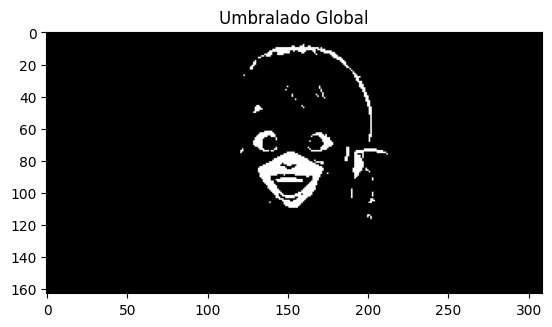

In [139]:
#Segmentar objwtos de la imagen mediante umbralado global
ret, binary_global = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_global, cmap='gray')
plt.title('Umbralado Global')
plt.show()

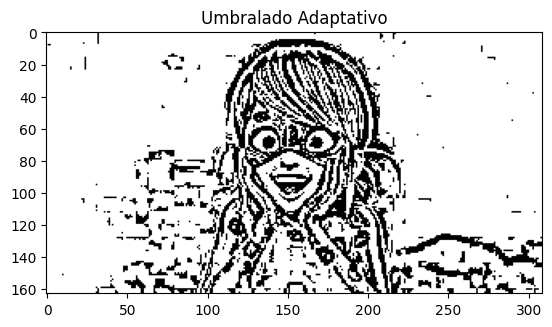

In [140]:
#Segmentar objetos de la imagen mediante umbralado adaptativo
binary_adaptive = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(binary_adaptive, cmap='gray')
plt.title('Umbralado Adaptativo')
plt.show()

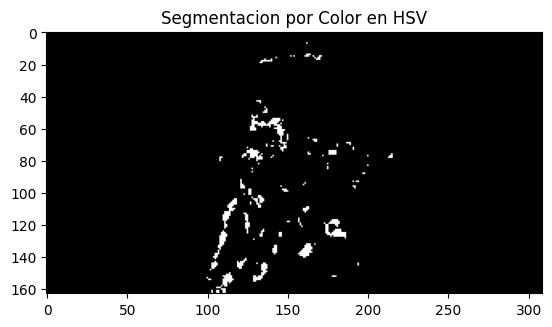

In [141]:
# Segmentacion por color en espacio HSV
hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
# Definir rango de color para segmentacion (ejemplo: rojo)
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])
mask = cv2.inRange(hsv_image, lower_red, upper_red)
plt.imshow(mask, cmap='gray')
plt.title('Segmentacion por Color en HSV')
plt.show()

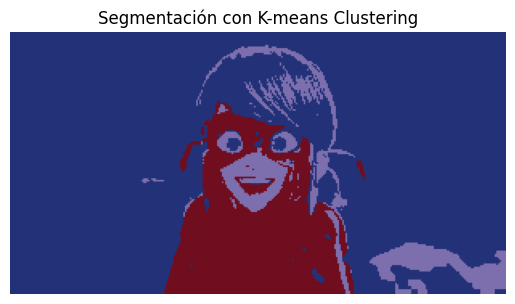

In [145]:
# Segmentacion objetos de la imagen mediante k-means clustering
from sklearn.cluster import KMeans
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen
image = cv2.imread('images.jpg')
Z = image.reshape((-1, 3))

# Definir número de clusters
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(Z)

# Obtener etiquetas y reconstruir imagen segmentada
labels = kmeans.labels_
centers = np.uint8(kmeans.cluster_centers_)
segmented_img = centers[labels].reshape(image.shape)

# Mostrar resultado
plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
plt.title('Segmentación con K-means Clustering')
plt.axis('off')
plt.show()

# Parte 5. Camara de video y bordes canny

In [ ]:
#------------------------------------------------------------------------------------------------------------------
#   Camera test program
#------------------------------------------------------------------------------------------------------------------

import cv2

cam_port = 1
cam = cv2.VideoCapture(cam_port)

while True:

    result, frame = cam.read()    
    
    if result: 

        cv2.imshow("Press q to quit", frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        print("No image detected")
        break

cam.release()
cv2.destroyAllWindows()

#------------------------------------------------------------------------------------------------------------------
#   End of file
#------------------------------------------------------------------------------------------------------------------

No image detected
